# Домашнее задание по теме: Регрессия (линейная/полиномиальная) с использованием `Pipeline`

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install pandas matplotlib numpy seaborn scikit-learn -y

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод. 

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Обязательно **использовать `Pipeline`**.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scipy
from scipy import stats

## Загрузка данных

[Источник (Medical Cost Personal Datasets)](https://www.kaggle.com/mirichoi0218/insurance)

In [9]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Преобразование типов

Привести в порядок типы данных. В результате не должно быть типа `object`.

In [10]:
df_new = df
df_new["is_smoker"] = df.smoker.map({'yes': True, 'no': False})
df_new["is_male"] = df.sex.map({'male': True, 'female': False})
dummies = pd.get_dummies(df[['region']])
df_new = df.join(dummies)

df_new.drop(['smoker','sex','region'], axis = 1, inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   is_smoker         1338 non-null   bool   
 5   is_male           1338 non-null   bool   
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: bool(2), float64(2), int64(2), uint8(4)
memory usage: 49.8 KB


## Разделить на train/test

- Разделить данные на `y` и `X`. 
- `y` - это колонка `charges`.
- Разделить данные на train / test.
- **В дальнейшем при анализе использовать строго `train` данные и не подсматривать в `test`.**

In [11]:
from sklearn.model_selection import train_test_split

y = df_new[['charges']].copy()
X = df_new[['is_smoker']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<AxesSubplot:>

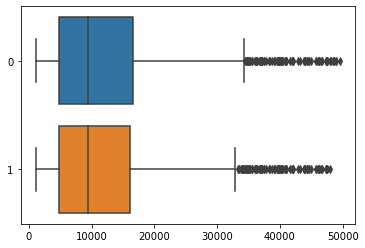

In [13]:
df_train = X_train.join(y_train)
charges_with = df_train['charges']         
        
z = stats.zscore(charges_with)
z_abs = np.abs(z)
z_threshold = 3
charges_without_z = charges_with[z_abs < z_threshold]
charges_without_z

df_train['charges_new'] = charges_without_z 
df_train.dropna(inplace=True)

X_train = pd.DataFrame(df_train.is_smoker)
y_train = pd.DataFrame(df_train.charges)

len(charges_with) - len(charges_without_z)
sns.boxplot(data=[charges_with, charges_without_z], orient='h')

## Полиномиальная множественная регрессия

- Можно использовать любое количество признаков.
- Попробовать несколько различных степеней полинома.
- Если необходимо, то использовать методы feature engineering.
- Помнить о том, что может быть полезна нормализация/стандартизация.
- Обучить модель линейной регрессии.
- Проанализировать результаты (различные метрики).

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

pipeline = Pipeline(steps = [
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

In [15]:

param_grid = {
    'poly__degree': [1, 2, 3]
}
model_gcv = GridSearchCV(pipeline, param_grid, n_jobs=-1)
model_gcv.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % model_gcv.best_score_)
print(model_gcv.best_params_)

Best parameter (CV score=0.575):
{'poly__degree': 2}


In [17]:
from sklearn import set_config                      # to change the display
from sklearn.utils import estimator_html_repr       # to save the diagram into HTML format

# set config to diagram for visualizing the pipelines/composite estimators
set_config(display='diagram')

# saving pipeline as html format
with open('./tmp/pipeline.html', 'w') as f:  
    f.write(estimator_html_repr(model_gcv.best_estimator_))
    
# the best estimator from grid search
model_gcv.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures()), ('model', LinearRegression())])

In [18]:
model_gcv.best_estimator_['poly'].n_input_features_, model_gcv.best_estimator_['poly'].n_output_features_

(1, 3)

In [19]:
model_gcv.best_estimator_['poly'].powers_

array([[0],
       [1],
       [2]], dtype=int64)

In [20]:
y_predicted = model_gcv.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_true=y_test, y_pred=y_predicted))

Mean absolute error: 5694.11
Residual sum of squares (MSE): 54823214.58
R2-score: 0.63


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_gcv.best_estimator_, X_test, y_test, cv=5)
print(f"scores: {scores}")
print("%0.2f score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scores: [0.68157368 0.65088307 0.64907291 0.56979274 0.63226374]
0.64 score with a standard deviation of 0.04
